In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as pp

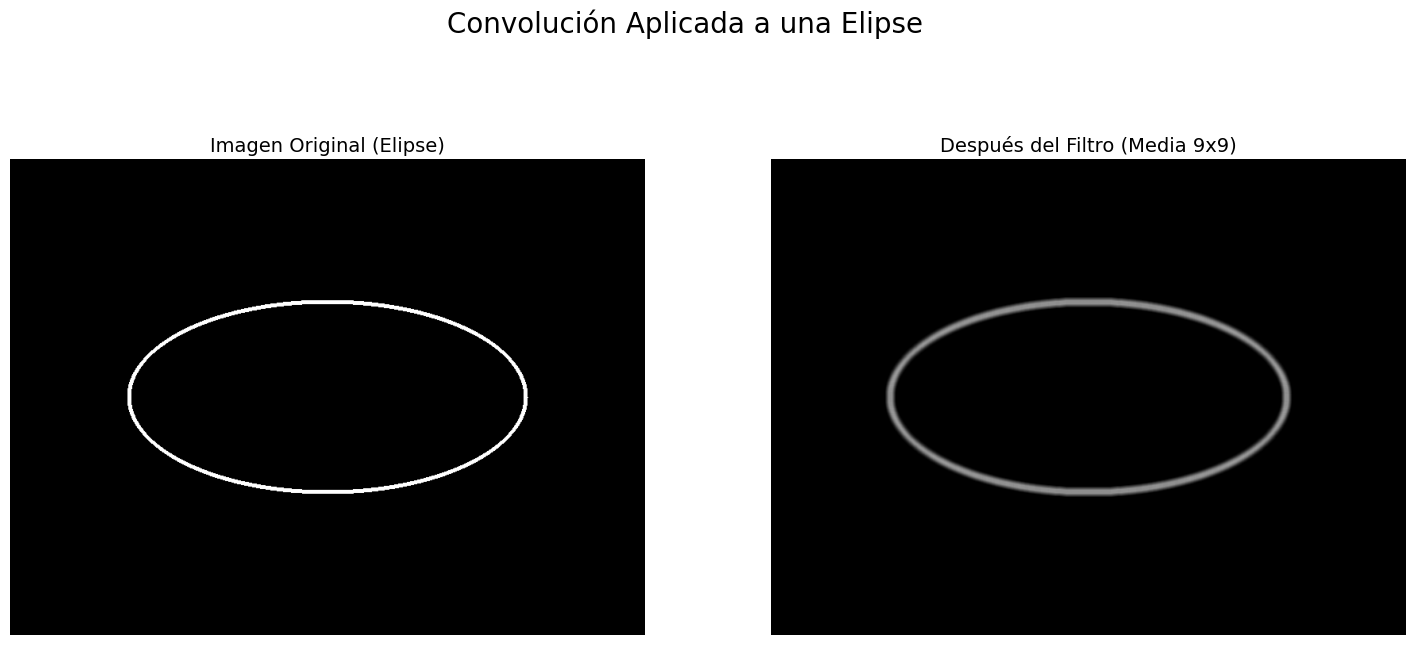

In [ ]:
# Crear la imagen base

ancho = 800
alto = 600

tensor_funcion = torch.ones((1, alto, ancho), dtype=torch.float32) * 0.0  # Fondo negro

cx = ancho / 2  # centro en X
cy = alto / 2  # centro en Y

# Parámetros de la elipse
a = 250  # eje mayor horizontal
b = 120  # eje menor vertical

color_linea = 1.0  # blanco
grosor = 2  # grosor de la curva


# Dibujar la elipse
# Ecuacion paramétrica:
# x=acos(t)+cx
# y=bsin⁡(t)+cy

for t in np.arange(0, 2 * np.pi, 0.001):
    px = int(a * np.cos(t) + cx)
    py = int(b * np.sin(t) + cy)

    # Dibujar la línea con grosor (círculo alrededor del punto)
    for dx in range(-grosor, grosor + 1):
        for dy in range(-grosor, grosor + 1):
            if dx*dx + dy*dy <= grosor*grosor:
                x2 = px + dx
                y2 = py + dy
                if 0 <= x2 < ancho and 0 <= y2 < alto:
                    tensor_funcion[0, y2, x2] = color_linea


# Definir el filtro

tam_kernel = 9  # Filtro de 9x9
padding_kernel = (tam_kernel - 1) // 2

kernel = torch.ones(
    (tam_kernel, tam_kernel), 
    dtype=torch.float32
) / (tam_kernel * tam_kernel)

kernel = kernel.unsqueeze(0).unsqueeze(0) 


# Aplicar convolución con nn.Conv2d

conv = nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=tam_kernel,
    padding=padding_kernel,
    bias=False
)

conv.weight.data = kernel

entrada = tensor_funcion.unsqueeze(0)
resultado = conv(entrada).squeeze().detach()


# Visualizar resultados

pp.figure(figsize=(18, 8))
pp.suptitle("Convolución Aplicada a una Elipse", fontsize=20)

# Imagen original
pp.subplot(1, 2, 1)
pp.title("Imagen Original (Elipse)", fontsize=14)
pp.imshow(
    tensor_funcion.squeeze().numpy(),
    cmap="gray",
    vmin=0,
    vmax=1
)
pp.axis("off")

# Imagen filtrada
pp.subplot(1, 2, 2)
pp.title("Después del Filtro (Media 9x9)", fontsize=14)
pp.imshow(
    resultado.numpy(),
    cmap="gray",
    vmin=0,
    vmax=1
)
pp.axis("off")

pp.show()


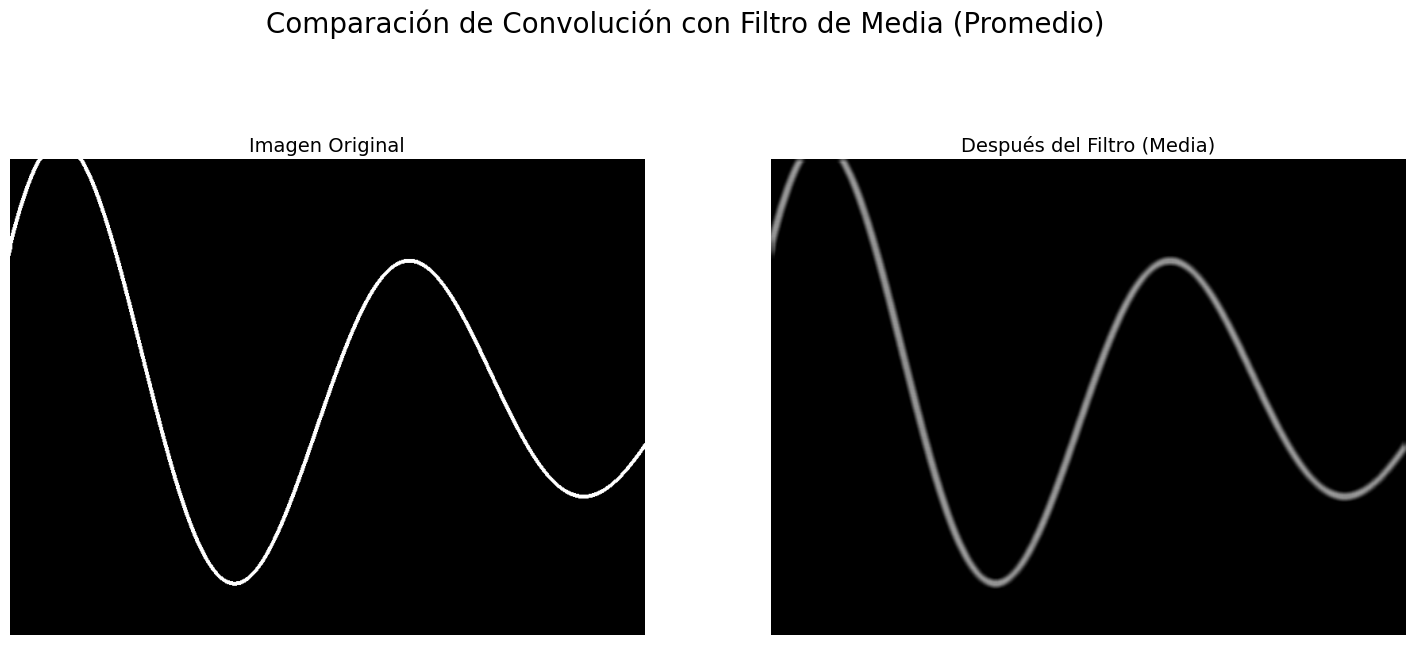

In [12]:
# ***** Crear la imagen *****
ancho = 800
alto = 600

tensor_funcion = torch.ones((1, alto, ancho), dtype=torch.float32) * 0.0  # Fondo negro
# tensor_funcion = torch.ones((1, alto, ancho), dtype=torch.float32) * 0.7  # Fondo gris claro

cx = ancho / 2
cy = alto / 2
escala_x = 70
escala_y = 200

# Color de línea fuerte para visualización
color_linea = 1.0  # blanco (en escala de grises, 1 es máximo)

# ***** Graficar función *****
# y=sin(x)⋅e−0.1x

grosor = 2

for x in np.arange(-8, 8, 0.001):
    y = np.sin(x) * np.exp(-0.1 * x)

    px = int(x * escala_x + cx)
    py = int(-y * escala_y + cy)

    # Dibujar la línea con grosor
    for dx in range(-grosor, grosor + 1):
        for dy in range(-grosor, grosor + 1):
            if dx**2 + dy**2 <= grosor**2:
                x2 = px + dx
                y2 = py + dy
                if 0 <= x2 < ancho and 0 <= y2 < alto:
                    tensor_funcion[0, y2, x2] = color_linea


# ***** Definir el filtro *****

tam_kernel = 9 # Filtro de 9x9
padding_kernel = (tam_kernel - 1) // 2

kernel = torch.ones(
    (tam_kernel, tam_kernel), 
    dtype=torch.float32
) / (tam_kernel * tam_kernel) 

kernel = kernel.unsqueeze(0).unsqueeze(0)


# ***** Aplicar nn.Conv2d() *****

conv = nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=tam_kernel,  
    padding=padding_kernel,
    bias=False
)

conv.weight.data = kernel

entrada = tensor_funcion.unsqueeze(0)
resultado = conv(entrada).squeeze().detach()

# ***** Visualización de resultados *****

pp.figure(figsize=(18, 8))
pp.suptitle("Comparación de Convolución con Filtro de Media (Promedio)", fontsize=20)

pp.subplot(1, 2, 1)
pp.title("Imagen Original", fontsize=14)
pp.imshow(
    tensor_funcion.squeeze().numpy(), 
    cmap="gray",
    vmin=0,  # 0 es negro
    vmax=1   # 1 es blanco
)
pp.axis("off")

pp.subplot(1, 2, 2)
pp.title("Después del Filtro (Media)", fontsize=14)
pp.imshow(
    resultado.numpy(), 
    cmap="gray",
    vmin=0,  
    vmax=1  
)
pp.axis("off")

pp.show()

In [9]:
tam_kernel = 7
padding_kernel = (tam_kernel - 1) // 2

kernel = torch.ones(
    (tam_kernel, tam_kernel), 
    dtype=torch.float32
) / (tam_kernel * tam_kernel) 

kernel = kernel.unsqueeze(0).unsqueeze(0)

kernel

tensor([[[[0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
          [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
          [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
          [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
          [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
          [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
          [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204]]]])

In [8]:
padding_kernel

3